In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# Sobel x-axis kernel
SOBEL_X = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]], dtype="int32")

# Sobel y-axis kernel
SOBEL_Y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]], dtype="int32")

# Gaussian kernel
GAUSS = np.array([
    [1/16, 2/16, 1/16],
    [2/16, 4/16, 2/16],
    [1/16, 2/16, 1/16]], dtype="float64")

In [3]:
#Zero padding of numpy array
def zero_padding(img, kernel):
    m, n = img.shape[0], img.shape[1]
    p, q = kernel.shape[0] // 2, kernel.shape[1] // 2
    pad = ((p, p), (q, q))
    padded_img = np.pad(img, pad, mode='constant', constant_values=0)
    return padded_img

In [4]:
def convolution(img, kernel):
    m, n = img.shape[0], img.shape[1]
    p, q = kernel.shape[0] // 2, kernel.shape[1]//2
    
    padded_img = zero_padding(img, kernel)
    
    P = np.empty(img.shape, dtype=np.float64)
            
    for i in np.arange(p, m+p):
        for j in np.arange(q, n+q):
            roi = padded_img[i - p:i + p + 1, j - q:j + q + 1]
            P[i - p, j - q] = (roi*kernel).sum()
    return P

In [5]:
def convolve(img, kernel):
    result_img = convolution(img, kernel)
    
    if (result_img.dtype == np.float64):
        kernel = kernel / 255.0
        kernel = (kernel*255).astype(np.uint8)
    else:
        result_img = result_img + abs(np.amin(g))
        result_img = result_img / np.amax(g)
        result_img = (result_img*255.0)
        
    return result_img

In [6]:
img1 = cv2.imread('D:\ASSIGNMENT\CV\Assignment 3\seq_000001.jpg',0)
img2 = cv2.imread('D:\ASSIGNMENT\CV\Assignment 3\seq_000003.jpg',0)

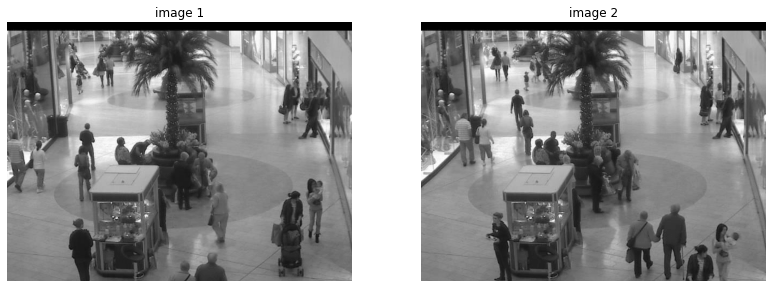

In [7]:
plt.figure(figsize=(21, 21))
plt.subplot(131), plt.imshow(img1, cmap = 'gray')
plt.title("image 1")
plt.axis('off')
plt.subplot(132), plt.imshow(img2, cmap = 'gray')
plt.title("image 2")
plt.axis('off')
plt.show()

In [8]:
gauss1=convolve(img1, GAUSS)
gauss2=convolve(img2, GAUSS)

(-0.5, 639.5, 479.5, -0.5)

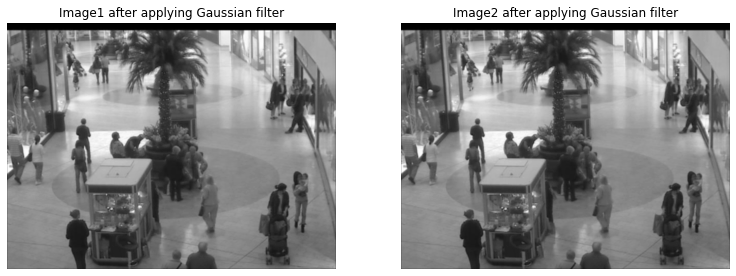

In [9]:
plt.figure(figsize=(20, 20))
plt.subplot(131), plt.imshow(gauss1, cmap = 'gray')
plt.title("Image1 after applying Gaussian filter")
plt.axis('off')
plt.subplot(132), plt.imshow(gauss1, cmap = 'gray')
plt.title("Image2 after applying Gaussian filter")
plt.axis('off')

In [10]:
mask_x=np.array((
    [-1,1],
    [-1,1]))
mask_y=np.array((
    [-1,-1],
    [1,1]))
mask_t1=np.array((
    [-1,-1],
    [-1,-1]))
mask_t2=np.array((
    [1,1],
    [1,1]))

In [11]:
from scipy import signal
fx=signal.convolve2d(gauss1,mask_x,mode='same')+signal.convolve2d(gauss2,mask_x,mode='same')
fy=signal.convolve2d(gauss1,mask_y,mode='same')+signal.convolve2d(gauss2,mask_y,mode='same')
ft=signal.convolve2d(gauss1,mask_t1,mode='same')+signal.convolve2d(gauss2,mask_t2,mode='same')

(-0.5, 639.5, 479.5, -0.5)

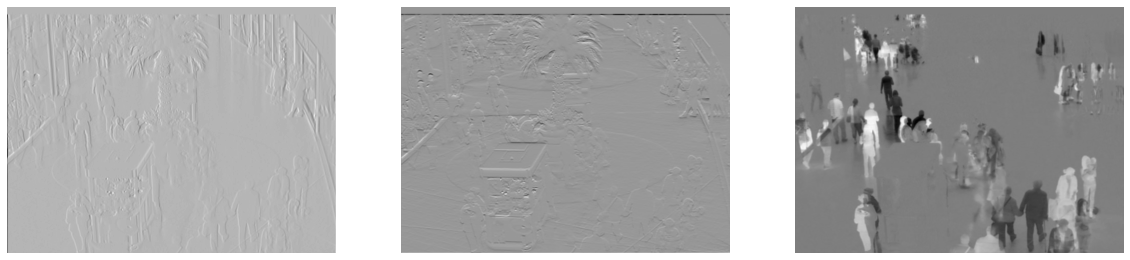

In [12]:
f=plt.figure(figsize=(20,20))

plt.subplot(131), plt.imshow(fx, cmap = 'gray')
plt.axis('off')
plt.subplot(132), plt.imshow(fy, cmap = 'gray')
plt.axis('off')
plt.subplot(133), plt.imshow(ft, cmap = 'gray')
plt.axis('off')

In [13]:
u=np.zeros(img1.shape)
v=np.zeros(img1.shape)

In [14]:
for i in range(1,u.shape[0]):
    for j in range(1,u.shape[1]):  
        #Focus on 3*3 window
        fxx=fx[i-1:i+2,j-1:j+2].flatten()
        fyy=fy[i-1:i+2,j-1:j+2].flatten()
        ftt=ft[i-1:i+2,j-1:j+2].flatten()
        
        #Take fxx and fyy in two row of a matrix and then take transpose
        A=np.vstack([fxx,fyy]).T
        
        #x = ((A.T * A)^(-1))*(A * b)
        #multiply of A.T and A
        B = np.matmul(A.T, A)
        
        #find inverse of B. Here pinv(B) is used to find pseudo inverse.As B is 
        #invertible pinv(B) and inv(B) give same result
        C = np.linalg.pinv(B)
        
        res = np.matmul(np.matmul(C, A.T), ftt)
        
        u[i,j]=res[0]
        v[i,j]=res[1]
uc=u
vc=v

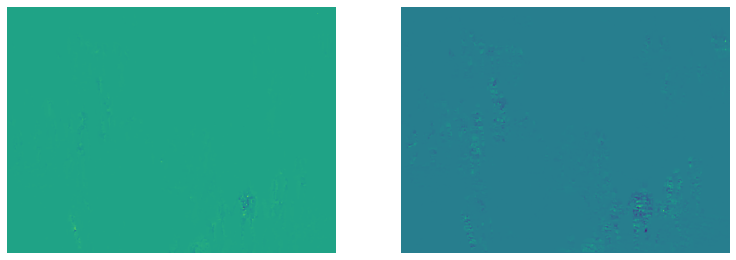

In [15]:
plt.figure(figsize=(20, 20))
plt.subplot(131)
plt.imshow(u)
plt.axis('off')
plt.subplot(132)
plt.imshow(v)
plt.axis('off')
plt.show()

In [16]:
n, m = u.shape
u_deci = u[np.ix_(range(0, n, 5), range(0, m, 5))]
v_deci = v[np.ix_(range(0, n, 5), range(0, m, 5))]
[X,Y] = np.meshgrid(np.arange(m, dtype = 'float64'), np.arange(n, dtype = 'float64'))
X_deci = X[np.ix_(range(0, n, 5), range(0, m, 5))]
Y_deci = Y[np.ix_(range(0, n, 5), range(0, m, 5))]

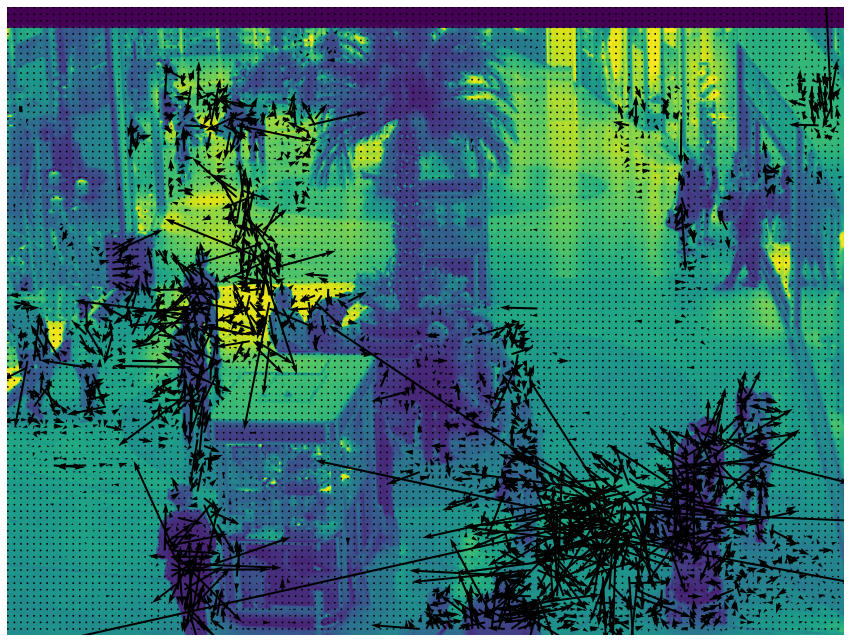

In [17]:
plt.figure(figsize=(15,15))
plt.imshow(img1) 
plt.quiver(X_deci, Y_deci, u_deci, v_deci)
plt.axis('off')
plt.show()